# EDAAA

In [12]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [13]:
contracts = pd.read_csv('Контракты 44ФЗ.csv', ';')

In [14]:
sprav = pd.read_csv('Справочник пром производства.csv', ';')

In [15]:
offers = pd.read_csv('Ценовые предложения поставщиков.csv', ';')

# General info for every file

In [16]:
contracts.head()

,product_name,price,product_vat_rate,product_msr,product_characteristics,okpd2_code,okpd2_name,inn,country_code
0,Драм-юнит Cet CET8997,7605.00,0%,Штука,NaN,28.23.25.000,Части и принадлежности прочих офисных машин,6a2325da490021b46bb00834ab4a560a,156
1,Лук репчатый,48.75,Без НДС,Килограмм,Дополнительные показатели (характеристики): Ук...,01.13.43.110,Лук репчатый,c8f328b188e78a1673db8cc2db1b6828,643
2,Карандаш механический (Страна происхождения : ...,8.00,20%,Штука,NaN,32.99.12.130,Карандаши механические,9d785973706feeff180ee96a247135e6,156
3,Имплантаты для остеосинтеза варианты исполнени...,5200.00,Без НДС,Штука,NaN,32.50.50.190,"Изделия медицинские, в том числе хирургические...",5a35794bbd7c29420b25479364c26c7b,616
4,Говядина замороженная для детского питания,490.59,Без НДС,Килограмм,NaN,10.11.31.130,Говядина и телятина замороженные для детского ...,91c23daf46d288344828eac627074bf3,643


In [17]:
sprav.head()

,product_name,price,product_vat_rate,product_msr,product_characteristics,okpd2_code,okpd2_name,inn,country_code
0,Натрий двууглекислый,NaN,Без НДС,Тонна метрическая тонна (1000 кг),Описание: Натрий двууглекислый || Массовая дол...,20.13.43,Карбонаты,22f5fd1c91e58e210ee693fd834b0ffa,643.0
1,Гидрокарбонат натрия. Пищевая добавка E500(ii),NaN,Без НДС,Тонна метрическая тонна (1000 кг),Описание: Гидрокарбонат натрия. Пищевая добавк...,20.13.43.191,Водородкарбонат натрия (бикарбонат натрия),22f5fd1c91e58e210ee693fd834b0ffa,643.0
2,маневровый тепловоз ТЭМ18ДМ,NaN,Без НДС,Штука,Описание: маневровый тепловоз ТЭМ18ДМ || Мощно...,30.20.12.120,Тепловозы маневровые и промышленные,21578d9b4a3c742d2a450e89dafe3e54,643.0
3,Тепловоз магистральный грузовой двухсекционный...,NaN,Без НДС,Секция,Описание: Тепловоз магистральный грузовой двух...,30.20.12.110,Тепловозы магистральные,21578d9b4a3c742d2a450e89dafe3e54,643.0
4,Универсальный фронтальный мини-погрузчик с бор...,NaN,Без НДС,Штука,Описание: Универсальный фронтальный мини-погру...,28.92.25.000,Погрузчики фронтальные одноковшовые самоходные,23dfc06d1aa3f159711b0833da1310cc,643.0


In [18]:
offers.head()

,product_name,price,product_vat_rate,product_msr,product_characteristics,okpd2_code,okpd2_name,inn,country_code
0,"Мешки для мусора 240 л, черные, ПВД, 100 мкм, ...",24.22,20%,Штука,Объем: 240.0л дм[3*] || Вид материала: ПВД || ...,22.22.1,Изделия пластмассовые упаковочные,8862f4d4ee368febd5fac195c84f8dde,NaN
1,Степ платформа,4340.98,Без НДС,Штука,Описание: Степ платформа || Виды товаров спорт...,32.30.14.129,"Оборудование для занятий физкультурой, гимнаст...",605fc8ce2b603efc77cefa563781105f,156.0
2,Скобы для степлера,114.00,Без НДС,Штука,Описание: Скобы для степлера || Количество в у...,25.99.23.000,"Детали для скоросшивателей или папок, канцеляр...",766fe416835260900f67379de663439c,NaN
3,"Эмаль Vika МЛ-1110 Апельсин Камаз 0,8 кг",709.00,Без НДС,Штука,Тип краски: Однокомпонентная синтетическая эма...,29.32.30.390,Части и принадлежности для автотранспортных ср...,71b52ca820c667fb8cebd3fcf362ac79,643.0
4,Средство дезинфицирующее Део-бактер 1л,499.00,20%,Флакон,Объем: 1л дм[3*] || Действующие вещества: ЧАС ...,20.20.14.000,Средства дезинфекционные,c2c3bea3f9fe8262cea420f1b6d3772b,NaN


In [35]:
null_counts = pd.DataFrame({"Contracts_num_null": contracts.isnull().sum(), "Sprav_num_null": sprav.isnull().sum(), "Offers_num_null": offers.isnull().sum()})
null_counts["Null%_contracts"] = null_counts['Contracts_num_null'] / contracts.shape[0] * 100
null_counts["Null%_sprav"] = null_counts['Sprav_num_null'] / sprav.shape[0] * 100
null_counts["Null%_offers"] = null_counts['Offers_num_null'] / offers.shape[0] * 100
null_counts

,Contracts_num_null,Sprav_num_null,Offers_num_null,Null%_contracts,Null%_sprav,Null%_offers
product_name,0,0,0,0.0000,0.000000,0.000000
price,0,102226,0,0.0000,96.914136,0.000000
product_vat_rate,0,0,0,0.0000,0.000000,0.000000
product_msr,0,519,6,0.0000,0.492032,0.002694
product_characteristics,788912,0,0,78.8912,0.000000,0.000000
okpd2_code,0,0,0,0.0000,0.000000,0.000000
okpd2_name,0,0,0,0.0000,0.000000,0.000000
inn,0,0,0,0.0000,0.000000,0.000000
country_code,1136,14763,60145,0.1136,13.995886,27.005608


### Выводы

1. Много пропусков описаний в Контрактах
2. Почти нет цен в Справочнике

Что делать?
Возможно заполнить описание в Контрактах описанием из Справочника

In [61]:
sprav.loc[sprav.inn.isin(contracts.inn) & sprav.product_name.isin(contracts.product_name)].shape

(495, 9)

Мало данных -- нет смысла тратить время

## Исследуем price

In [121]:
df = pd.concat([contracts, offers, sprav])
df.reset_index(drop=True, inplace=True)

In [277]:
df.describe()

,price,lens
count,1.224894e+06,1.328194e+06
mean,3.066033e+05,5.543654e+01
std,1.221253e+08,5.885460e+01
min,1.000000e-11,1.000000e+00
25%,1.376625e+02,2.700000e+01
50%,5.424100e+02,4.400000e+01
75%,3.133297e+03,6.700000e+01
max,8.570092e+10,2.000000e+03


1. Цена 0 -- заменить на NaN
2. Max сильно отличается от квартилей -- 

In [123]:
df.price.quantile(0.99)

322856.13

In [261]:
df[df.price > df.price.quantile(0.999)].head()

,product_name,price,product_vat_rate,product_msr,product_characteristics,okpd2_code,okpd2_name,inn,country_code,lens
910,Стерилизатор плазменный Stericool с использова...,7947255.33,Без НДС,Штука,NaN,32.50.12.190,Стерилизаторы хирургические или лабораторные п...,4e38c8eb41f782362a1cae5a800afee4,616,101
1317,Поставка расходного материала для оказания мед...,21859725.85,0%,Комплект,NaN,32.50.13.190,"Инструменты и приспособления, применяемые в ме...",e6496e2fe849132ffbc743215deeabdf,840,79
1539,Инструменты и приборы прочие,8791217.38,20%,Комплект,NaN,26.51.12.190,Инструменты и приборы прочие,0307dca857ba628e5c4a0c107ffd920b,208|156|380|643|392|040|250|276|756|840|203|826,28
4647,Технологическое оборудование,26837078.63,20%,Условная единица,NaN,41.20.40.900,Работы строительные по возведению нежилых здан...,61e3ece982a286eef0da2062e7621b3f,643,28
6756,Симулятор взрослого пациента РП.В.ХФ,7700000.00,Без НДС,Штука,NaN,32.99.53.120,Тренажеры для профессионального обучения,0ad5adb7cd54528b663495292fd5f4c3,643,36


--

Очень большая цена -- либо дорогое оборудование, либо дана цена за комплект, т.е. цена_за_штуку * неизвестное_количество (или контракт на поставку)  => было бы хорошо тщательно почистить данные

--

In [275]:
df.price.replace(0, np.nan, inplace=True)
df.price.replace(1, np.nan, inplace=True)

In [ ]:
cnt = df.price.count()

In [199]:
df.price.quantile(0.95)

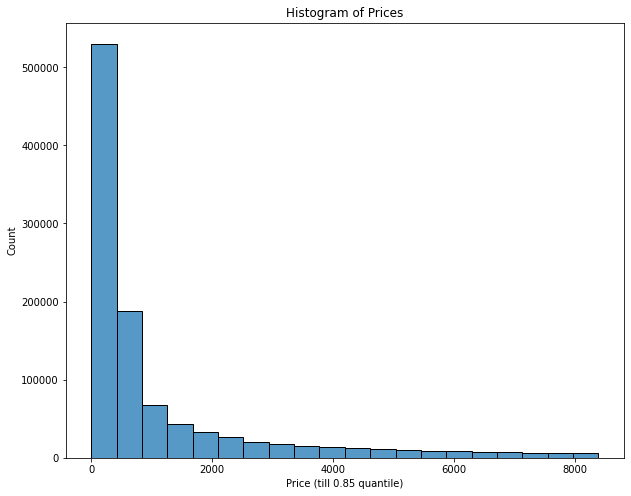

In [276]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='price', binrange=(0, df.price.quantile(0.85)), bins = 20)
plt.title("Histogram of Prices")
plt.xlabel("Price (till 0.85 quantile)")
plt.ylabel("Count")
plt.show()

### Цены для конкретных товаров

In [265]:
onion = df[df['product_name'].str.contains('Лук') == True]

<AxesSubplot:xlabel='price', ylabel='Count'>

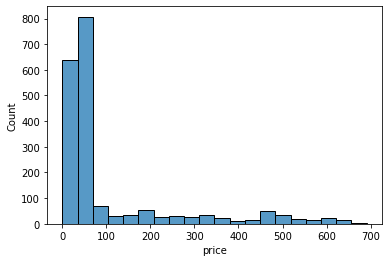

In [268]:
sns.histplot(x=onion['price'], binrange=(0, onion.price.quantile(0.95)), bins = 20)

In [270]:
gas_analyzer = df[df['product_name'].str.contains(r'.азоанализатор') == True]

<AxesSubplot:xlabel='price', ylabel='Count'>

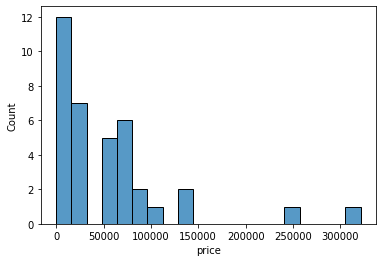

In [272]:
sns.histplot(x=gas_analyzer['price'], binrange=(0, gas_analyzer.price.quantile(0.95)), bins = 20)

## Исследуем product_name

In [125]:
df['lens'] = df['product_name'].apply(lambda x: len(x))

In [126]:
df.lens.describe()

count    1.328194e+06
mean     5.543654e+01
std      5.885460e+01
min      1.000000e+00
25%      2.700000e+01
50%      4.400000e+01
75%      6.700000e+01
max      2.000000e+03
Name: lens, dtype: float64

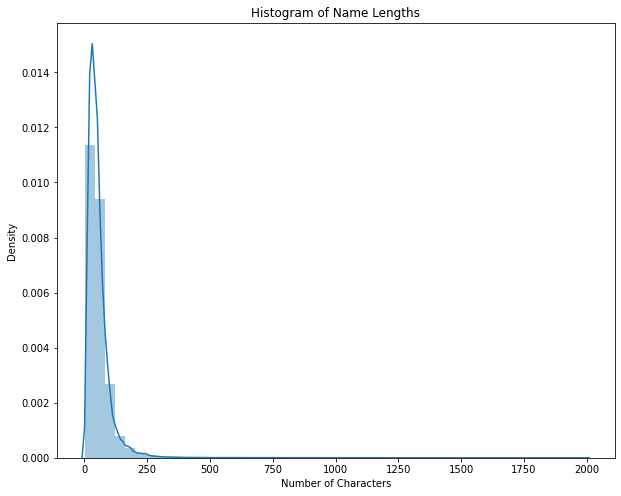

In [160]:
plt.figure(figsize=(10, 8))
sns.distplot(lens)
plt.title("Histogram of Name Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Density")
plt.show()

In [161]:
df[df.lens == 1]

,product_name,price,product_vat_rate,product_msr,product_characteristics,okpd2_code,okpd2_name,inn,country_code,lens
254980,м,772.75,10%,Штука,NaN,58.11.11.000,Учебники печатные общеобразовательного назначения,7403de10a7d9337677da1cfdab364bbb,643,1
478025,р,147.77,Без НДС,Штука,NaN,29.32.30.390,Части и принадлежности для автотранспортных ср...,2abab90eb911b70e53a05ba7a526e235,643,1
658048,С,15.00,Без НДС,Пара (2 шт.),NaN,22.19.60.119,Перчатки резиновые прочие,7462876f8eab181ee6d18a191ae659f4,458,1


bad

In [131]:
df[df.lens == df.lens.max()].head(1)

,product_name,price,product_vat_rate,product_msr,product_characteristics,okpd2_code,okpd2_name,inn,country_code,lens
172426,Стент мочеточниковый полимерный. Номинальный д...,4900.0,Без НДС,Штука,NaN,32.50.22.199,"Протезы органов человека прочие, не включенные...",7b587491da351f3b90f5cf95b9bac1d9,156|484|276|372|756|188|850,2000


In [134]:
df[df.lens == df.lens.max()]['product_name'][172426]

'Стент мочеточниковый полимерный. Номинальный диаметр стента:  2 (мм), Общая длина стента: 260 (мм). Стенты мочеточниковые Percuflex, Percuflex Plus, Contour, Contour VL с принадлежностями  Пр: (Германия, Швейцария, Китай, США, Ирландия, Мексика, Коста-Рика) (Страна происхождения : Германия, Швейцария, Китай, США, Ирландия, Мексика, Коста-Рика  Продолжение : Наименование, функциональные, качественные характеристики товара : :  2 (мм), Общая длина стента: 260 (мм). Стенты мочеточниковые Percuflex, Percuflex Plus, Contour, Contour VL с принадлежностями  Наименование, функциональные, качественные характеристики товара : Конструкция: с петлей (петлями). МРТ совместимость: да. Номинальный диаметр стента:  2 (мм), Общая длина стента: 260 (мм). Покрытие: гидрофильное. Дополнительные характеристики:  Стерильный. Одноразовый (обусловлено клинической необходимостью). Максимальный срок имплантации стента в тело пациента 365 дней (Требуется для уменьшения количества вмешательств с целью замены сте

bad x2

Можно поместить в описание

## Исследуем product_msr

In [136]:
df.product_msr.value_counts()

Штука                                             994166
Килограмм                                          90892
Упаковка                                           61475
Набор                                              43050
Литр кубический дециметр                           28420
                                                   ...  
Тысяча флаконов                                        1
Процент                                                1
Международная единица биологической активности         1
Кубический ярд (0,764555 м3)                           1
Тысяча вагоно (машино)-часов                           1
Name: product_msr, Length: 171, dtype: int64

Тысяча флаконов...

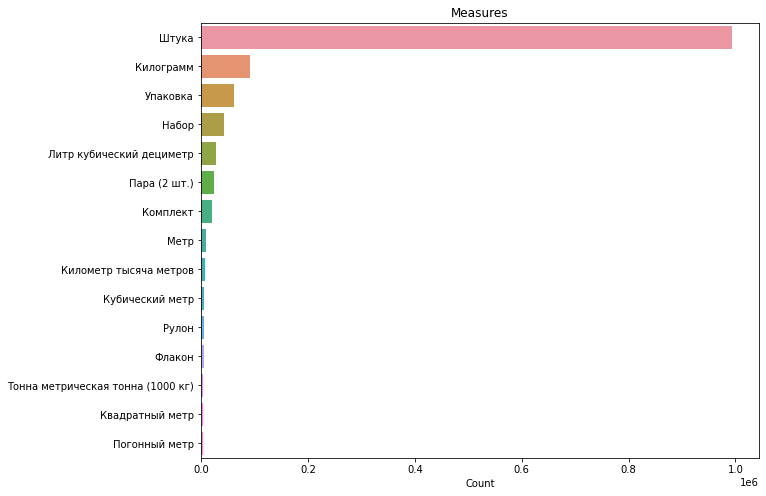

In [273]:
plt.figure(figsize=(10, 8))
msr = pd.DataFrame({"Count": df.product_msr.value_counts()})
sns.barplot(y=msr[0:15].index, x=msr[0:15]["Count"], orient='h')
plt.title("Measures")
plt.show()

## okdp2_code

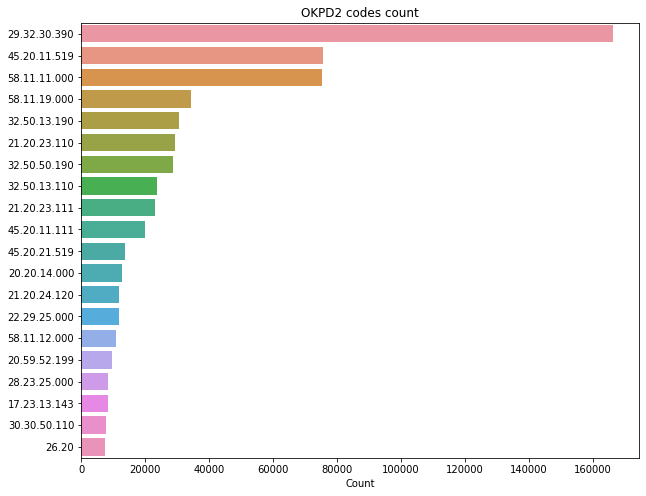

In [157]:
plt.figure(figsize=(10, 8))
codes = pd.DataFrame({"Count": df["okpd2_code"].value_counts()})
sns.barplot(y=codes[0:20].index, x=codes[0:20]["Count"], orient='h')
plt.title("OKPD2 codes count")
plt.show()

In [274]:
df.okpd2_code.value_counts()

29.32.30.390    166090
45.20.11.519     75611
58.11.11.000     75348
58.11.19.000     34276
32.50.13.190     30540
                 ...  
25.99.12.120         1
20.13.11.112         1
13.10.71.113         1
26.51.33.123         1
10.83.12.130         1
Name: okpd2_code, Length: 6237, dtype: int64

Расшифровка 29.32.30.390: Части и принадлежности для автотранспортных средств прочие, не включенные в другие группировки

Очень много ТРУ входит в один код, работать с ОКПД для поиска будет затруднительно (не нужно)

In [ ]:
okpd_lens = df['okpd2_code'].apply(lambda x: len(x))

## country_code 

In [141]:
df.country_code.value_counts()

643                                    758648
643.0                                  199656
156                                     71082
276                                     28686
156.0                                   28140
                                        ...  
498|643|792                                 1
392|616|756                                 1
152|156|643|688|792|032|620|031|710         1
156|643|112|528|840                         1
840|372|458                                 1
Name: country_code, Length: 3560, dtype: int64

Несколько стран

Разные форматы

In [142]:
df[df['country_code'] == '152|156|643|688|792|032|620|031|710']

,product_name,price,product_vat_rate,product_msr,product_characteristics,okpd2_code,okpd2_name,inn,country_code,lens
434747,Груши,223.33,Без НДС,Килограмм,Вид груш по сроку созревания: Раннего срока со...,01.24.21.000,Груши,2803ca74b64fc38a3e6c68303a101cb8,152|156|643|688|792|032|620|031|710,5


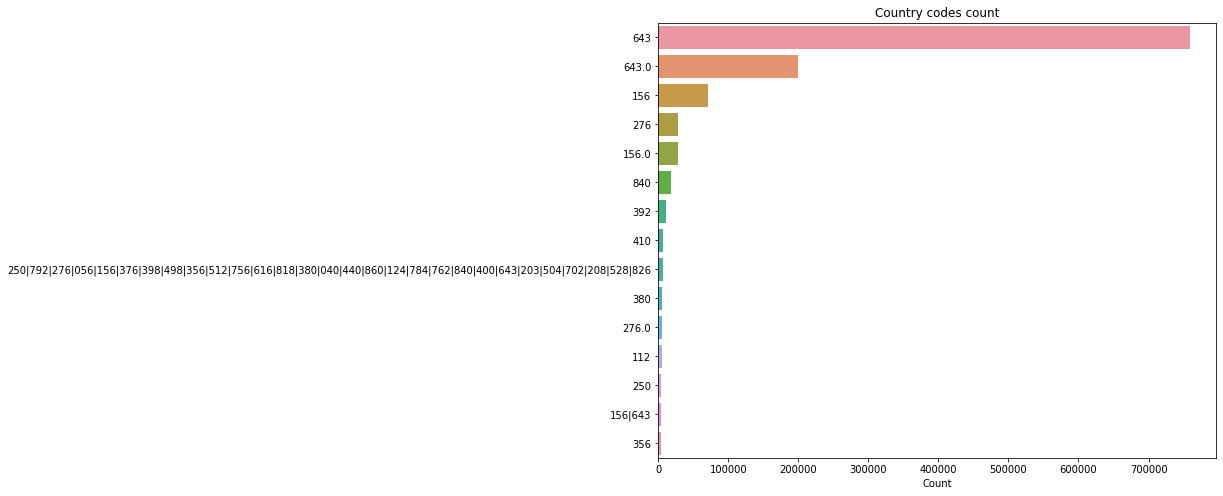

In [164]:
plt.figure(figsize=(10, 8))
ccodes = pd.DataFrame({"Count": df.country_code.value_counts()})
sns.barplot(y=ccodes[0:15].index, x=ccodes[0:15]["Count"], orient='h')
plt.title("Country codes count")
plt.show()

In [286]:
df[df['product_name'].str.contains('самолет')]

,product_name,price,product_vat_rate,product_msr,product_characteristics,okpd2_code,okpd2_name,inn,country_code,lens
14842,Якубович Н.В. Ил-18 и его модификации. Авиалай...,1188.00,10%,Штука,NaN,58.11.12.000,"Книги печатные профессиональные, технические и...",48ebe6bab8fa4981f87d10a7a11c6015,643,164
27664,"вертолёты военные, самолет-истребитель",640.00,Без НДС,Штука,NaN,32.40.39.191,"Игрушки пластмассовые транспортные, технически...",1bba9aa82f6272cf266575462abde922,112,38
109281,"Самые известные самолеты мира, Мерников А.Г.",953.70,10%,Штука,NaN,58.11.12.000,"Книги печатные профессиональные, технические и...",dbaf5fad2b91c802366234da30073c47,643,44
118116,Крапивин В.П. Ковер-самолет,844.40,10%,Штука,NaN,58.11.13.000,Книги печатные для детей,41ecb902d89630764ae18827686c36ce,643,27
157238,Русские самолеты Первой мировой: Крылья Россий...,1534.28,10%,Штука,NaN,58.11.12.000,"Книги печатные профессиональные, технические и...",48ebe6bab8fa4981f87d10a7a11c6015,643,58
340089,поставка авиационно-технического имущества (ши...,75562.59,20%,Штука,NaN,30.30.50.110,Комплектующие (запасные части) летательных апп...,a44ad47c1033078afade69bf9ae8ecde,643,101
343705,Пропавший самолет // Блайтон Э.,244.77,10%,Штука,NaN,58.11.13.000,Книги печатные для детей,4387c1e490667cf6958286f9819677ff,643,31
413764,Washing (Средство для мойки деталей самолетов),14401.80,20%,Штука,NaN,30.30.50.110,Комплектующие (запасные части) летательных апп...,4cca31fa316965eaf93fc4d3a28502d4,250|792|276|056|156|376|398|498|356|512|756|61...,46
493746,Четыре самолета,46.56,10%,Штука,NaN,58.11.19.000,"Книги, брошюры, листовки печатные прочие и под...",48ebe6bab8fa4981f87d10a7a11c6015,643,15
640998,Кронштейн в сборе самолет крепления г/ц подъем...,145051.00,20%,Штука,NaN,29.32.30.390,Части и принадлежности для автотранспортных ср...,07c36f98c2c437f0f15cfd49cac00f29,643,76
